# Team Ecologists
### Kaggle Data processing

This notebook processes the raw dataset 'bee_vs_wasp' from Kaggle

**Imports**

In [1]:
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from pathlib import Path

**Load Data**

In [2]:
data_directory = 'Data'

dataset_path=Path(data_directory)
data = pd.read_csv(dataset_path/'labels.csv')
data

,id,path,is_bee,is_wasp,is_otherinsect,is_other,photo_quality,is_validation,is_final_validation,label
0,1,bee1\10007154554_026417cfd0_n.jpg,1,0,0,0,1,0,0,bee
1,2,bee1\10024864894_6dc54d4b34_n.jpg,1,0,0,0,1,0,1,bee
2,3,bee1\10092043833_7306dfd1f0_n.jpg,1,0,0,0,1,1,0,bee
3,4,bee1\1011948979_fc3637e779_w.jpg,1,0,0,0,1,0,1,bee
4,5,bee1\10128235063_dca17db76c_n.jpg,1,0,0,0,1,0,0,bee
...,...,...,...,...,...,...,...,...,...,...
11415,11416,other_noinsect\581704.jpg,0,0,0,1,0,0,1,other
11416,11417,other_noinsect\581873.jpg,0,0,0,1,0,0,1,other
11417,11418,other_noinsect\581880.jpg,0,0,0,1,0,1,0,other
11418,11419,other_noinsect\6778651038_294d392627_n.jpg,0,0,0,1,0,0,1,other


## Load Images

We are loading all the images from their path

In [3]:
img = []
for i in range(0,data.shape[0]):
    
    img_path_string = data.iloc[i][1]
    #uncomment this line in mac OS
    #img_path_string = img_path_string.replace("\\", "/")
    img_path = dataset_path/img_path_string
    img.append(mpimg.imread(img_path))

Removing all images which have more than 3 channels i.e alpha etc

In [4]:
image_delete = []

In [5]:
for i in range(0,len(img)):
    shape = np.shape(img[i])
    if(len(shape)==2 or shape[2] != 3):
        image_delete.append(i)

In [6]:
print('We have',len(image_delete),'bad images')

We have 5 bad images


In [7]:
#data = data.drop(index = image_delete)

11420

In [8]:
for index in image_delete:
    img.pop(index)

**Saving labels separately**

In [10]:
y = data[['id','label']]

## Converting into a RGB dataframe

In [44]:
# img = []
# for i in range(0,data.shape[0]):
#     img.append(mpimg.imread('d:/Various/kaggle_bee_vs_wasp/'+data.iloc[i][1]))

In [11]:
for i in range(0,3):
    print('The image',i,'has this shape',np.shape(img[i]))

The image 0 has this shape (213, 320, 3)
The image 1 has this shape (213, 319, 3)
The image 2 has this shape (266, 320, 3)


**Image resizing and cropping**

As we can see we don't have the same resolution for all images. We will crop those images to have uniform image size with the following method :

In [12]:
def perfect_resize(img):
    x = np.shape(img)
    
    diff = np.abs(x[0] - x[1])
    a = int(diff/2)
    
    if(len(x) == 3):
        if (x[0] < x[1]):
            b = int(x[1]-(diff/2))
            res = img[:,a:b,:]
        else:
            b = int(x[0]-(diff/2))
            res = img[a:b,:,:]
    else:
        if (x[0] < x[1]):
            b = int(x[1]-(diff/2))
            res = img[:,a:b]
        else:
            b = int(x[0]-(diff/2))
            res = img[a:b,:]
        
    return res

In [13]:
for i in range(0,np.shape(img)[0]):
    img[i] = perfect_resize(img[i])

Now we check if all images have same dimensions

In [14]:
for i in range(0,len(img)):
    if(np.shape(img[i])[0] != np.shape(img[i])[1]):
        print(np.shape(img[0])[0],np.shape(img)[1])
        print("Erreur, des images ont mal été modifiés :" , i)

Checking the resolution of smallest image

In [15]:
mini = 1564
for i in range(0,len(img)):
    if np.shape(img[i])[0] < mini :
        mini = np.shape(img[i])[0]
        j = i
print(mini)

124


**Agreed resolution for target images**

In [16]:
mini = 64

So we reduced all images with this size :

In [17]:
for i in range(0,len(img)):
    temp = Image.fromarray(img[i])
    img[i] = np.array(temp.resize(size=(mini, mini)))

Checking for any error / image not in required size

In [43]:
image_delete = []
for i in range(0,len(img)):
    if len(np.shape(img[i])) < 3:
        image_delete.append(i)
    else:
        if (np.shape(img[i])[0] != mini) or (np.shape(img[i])[1] != mini) or (np.shape(img[i])[2] != 3):
            print('Error')
print("Bad images :", len(image_delete))

Bad images : 4


Remove bad images

In [45]:
for index in image_delete:
    img.pop(index)

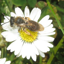

In [47]:
Image.fromarray(img[512])

Resized image looks fine

Preparing the images to be inserted in dataframe as features

In [48]:
for i in range(0,len(img)):
    img[i] = img[i].ravel()

In [55]:
for i in range(0,len(img)):
    if (np.shape(img[i])[0] != mini*mini*3):
        print('Error',i)

Error 10742
Error 10828
Error 11376


Now we will convert the array img into a dataframe :

In [57]:
column = []
for i in range(0,mini*mini):
    name = 'pixel_'+str(1+int(i/mini))+'_'+str(1+(i%mini))
    column.append(name+'_R')
    column.append(name+'_G')
    column.append(name+'_B')

In [58]:
np.shape(img)

(11411,)

In [59]:
images = pd.DataFrame(columns = column, data=img)

In [60]:
images

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_64_61_B,pixel_64_62_R,pixel_64_62_G,pixel_64_62_B,pixel_64_63_R,pixel_64_63_G,pixel_64_63_B,pixel_64_64_R,pixel_64_64_G,pixel_64_64_B
0,99,22,48,117,42,62,144,67,82,175,...,96.0,144.0,66.0,85.0,123.0,50.0,69.0,102.0,30.0,58.0
1,66,69,40,68,74,43,70,76,45,66,...,2.0,252.0,130.0,2.0,254.0,162.0,1.0,254.0,183.0,3.0
2,124,128,80,124,126,79,120,120,76,114,...,82.0,132.0,147.0,59.0,117.0,135.0,35.0,107.0,127.0,22.0
3,194,151,221,207,167,231,155,105,190,124,...,19.0,16.0,15.0,13.0,17.0,18.0,12.0,17.0,16.0,9.0
4,230,193,117,221,166,105,209,117,85,193,...,89.0,182.0,80.0,84.0,182.0,78.0,83.0,182.0,83.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11406,119,98,84,122,102,88,129,105,90,132,...,183.0,203.0,192.0,188.0,202.0,193.0,190.0,201.0,194.0,187.0
11407,48,51,64,120,121,128,208,213,212,236,...,72.0,48.0,58.0,71.0,45.0,57.0,74.0,48.0,57.0,72.0
11408,63,68,77,63,67,77,63,67,77,63,...,49.0,48.0,46.0,43.0,44.0,36.0,31.0,39.0,30.0,28.0
11409,29,35,34,24,35,39,24,35,38,24,...,161.0,161.0,164.0,171.0,170.0,168.0,169.0,177.0,174.0,175.0


**Adding label to the new created images dataframe**

In [68]:
yt = y.reset_index()['label']

In [69]:
images.insert(loc=0, column='label', value=yt)

In [70]:
cols = images.columns.tolist()

In [71]:
newcols = cols[1:]

In [72]:
newcols.append('label')

In [73]:
images = images[newcols]

In [74]:
images

,pixel_1_1_R,pixel_1_1_G,pixel_1_1_B,pixel_1_2_R,pixel_1_2_G,pixel_1_2_B,pixel_1_3_R,pixel_1_3_G,pixel_1_3_B,pixel_1_4_R,...,pixel_64_62_R,pixel_64_62_G,pixel_64_62_B,pixel_64_63_R,pixel_64_63_G,pixel_64_63_B,pixel_64_64_R,pixel_64_64_G,pixel_64_64_B,label
0,99,22,48,117,42,62,144,67,82,175,...,144.0,66.0,85.0,123.0,50.0,69.0,102.0,30.0,58.0,bee
1,66,69,40,68,74,43,70,76,45,66,...,252.0,130.0,2.0,254.0,162.0,1.0,254.0,183.0,3.0,bee
2,124,128,80,124,126,79,120,120,76,114,...,132.0,147.0,59.0,117.0,135.0,35.0,107.0,127.0,22.0,bee
3,194,151,221,207,167,231,155,105,190,124,...,16.0,15.0,13.0,17.0,18.0,12.0,17.0,16.0,9.0,bee
4,230,193,117,221,166,105,209,117,85,193,...,182.0,80.0,84.0,182.0,78.0,83.0,182.0,83.0,85.0,bee
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11406,119,98,84,122,102,88,129,105,90,132,...,203.0,192.0,188.0,202.0,193.0,190.0,201.0,194.0,187.0,other
11407,48,51,64,120,121,128,208,213,212,236,...,48.0,58.0,71.0,45.0,57.0,74.0,48.0,57.0,72.0,other
11408,63,68,77,63,67,77,63,67,77,63,...,48.0,46.0,43.0,44.0,36.0,31.0,39.0,30.0,28.0,other
11409,29,35,34,24,35,39,24,35,38,24,...,161.0,164.0,171.0,170.0,168.0,169.0,177.0,174.0,175.0,other


**Exporting the processed dataset as csv which has image pixels as the features/columns and the last column 'label' shows the label of each datapoint**

In [76]:
images.to_csv(dataset_path/'bee_wasps_final.csv',index=False)